# **Nonlinear Dimensionality Reduction**

### Apply the nonlinear dimensionality reduction methods Locally Linear Embedding (LLE) and ISOMAP to the dataset C, set the number of nearest neighbors to be 5, the projected low dimension to be 4

In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [260]:
data = pd.read_csv('DataC.csv')
data.head()

,Unnamed: 0,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,...,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784,gnd
0,1,4,4,3,0,0,4,2,1,4,...,1,3,0,4,2,1,1,4,5,0
1,2,5,1,4,3,1,3,5,1,4,...,1,1,3,3,1,3,3,5,4,0
2,3,1,3,0,3,1,1,0,1,0,...,3,0,2,4,2,2,1,2,4,0
3,4,5,3,2,3,5,2,2,0,4,...,5,4,5,1,4,4,2,4,4,0
4,5,3,5,3,3,0,4,1,1,4,...,1,3,3,3,1,2,4,1,1,0


In [261]:
missing_values = data.isna().sum()
print(missing_values[missing_values > 0])  

Series([], dtype: int64)


In [262]:
data.describe()

,Unnamed: 0,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,...,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784,gnd
count,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,...,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000
mean,1033.500000,2.508228,2.547435,2.460794,2.496612,2.472894,2.490319,2.486447,2.512585,2.522265,...,2.469506,2.522749,2.486447,2.449661,2.498064,2.525653,2.542110,2.400290,2.519361,2.035818
std,596.547148,1.477246,1.502839,1.499851,1.497128,1.509451,1.498071,1.501270,1.524326,1.502456,...,1.488060,1.515606,1.506422,1.511740,1.496160,1.511079,1.491353,1.527783,1.504107,1.398261
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,517.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1033.500000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000
75%,1549.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
max,2066.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000


In [263]:
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2066 entries, 0 to 2065
Columns: 786 entries, Unnamed: 0 to gnd
dtypes: int64(786)
memory usage: 12.4 MB


In [264]:
data = data.drop(columns=data.columns[0])
data

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784,gnd
0,4,4,3,0,0,4,2,1,4,1,...,1,3,0,4,2,1,1,4,5,0
1,5,1,4,3,1,3,5,1,4,4,...,1,1,3,3,1,3,3,5,4,0
2,1,3,0,3,1,1,0,1,0,2,...,3,0,2,4,2,2,1,2,4,0
3,5,3,2,3,5,2,2,0,4,5,...,5,4,5,1,4,4,2,4,4,0
4,3,5,3,3,0,4,1,1,4,3,...,1,3,3,3,1,2,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,4,0,3,0,4,0,4,3,1,2,...,0,1,4,5,4,2,2,2,2,4
2062,2,2,3,4,2,1,2,3,3,4,...,4,0,1,3,4,0,2,3,2,4
2063,2,3,2,3,1,2,5,5,5,0,...,5,1,1,2,5,2,1,1,3,4
2064,5,2,4,3,1,0,3,2,2,1,...,3,2,3,1,4,2,4,3,4,4


In [265]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [266]:
print("Classes present:")
print(set(y))

Classes present:
{0, 1, 2, 3, 4}


In [267]:
data_3 = data[data['gnd']==3]
x = data_3.iloc[:,:-1].values
y = data_3.iloc[:,-1].values

### Q1. Apply LLE to the images of digit ’3’ only. Visualize the original images by plotting the images corresponding to those instances on 2-D representations of the data based on the first and second components of LLE. Describe qualitatively what kind of variations is captured.


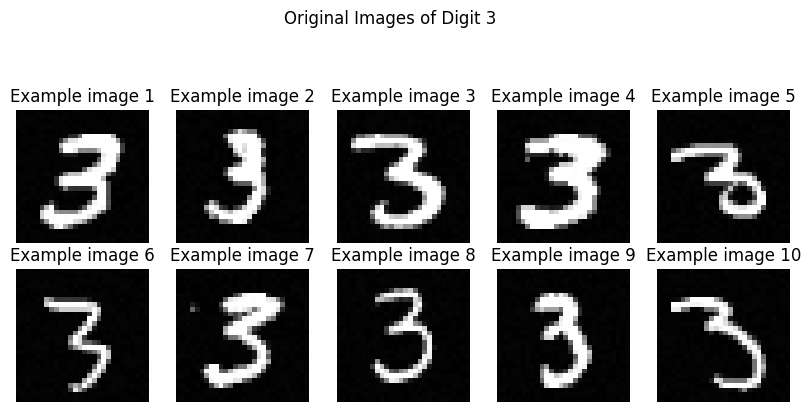

In [268]:
plt.figure(figsize=(10, 10))
for i in range(10):  # Plotting first 5 images
  plt.subplot(5, 5, i + 1)
  plt.imshow(x[i].reshape(28, 28), cmap='gray')
  plt.title(f'Example image {i+1}')
  plt.axis('off')
plt.suptitle('Original Images of Digit 3')
plt.show()

In [269]:
neighbours = 5
low_dimension = 4

In [270]:
lle = LocallyLinearEmbedding(n_neighbors = neighbours, n_components = 2)

x_lle = lle.fit_transform(x)

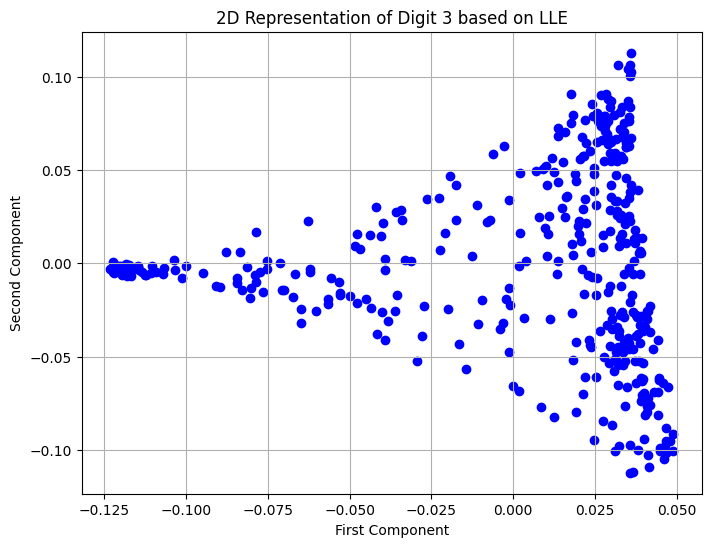

In [271]:
plt.figure(figsize=(8, 6))
plt.scatter(x_lle[:, 0], x_lle[:, 1], c='blue',marker='o')
plt.title('2D Representation of Digit 3 based on LLE')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.grid(True)
plt.show()

# **Analysis**

### The data points are dispersed primarily along the first component (horizontal axis); suggesting that this component captures the most significant variation within the data. 
### The second component captures the next most significant variation orthogonal to the first.
### We dont see distinct clusters, but there are regions where the points are more sparse. There could be potential outliers, on the fringes of the spread along the first component.

### Q2 Repeat step 1 using the ISOMAP method. Comment on the result. Does ISOMAP do better in some way? Are the patterns being found globally based or locally based?

In [272]:
isomap = Isomap(n_neighbors=neighbours, n_components = 2)

x_iso = isomap.fit_transform(x)

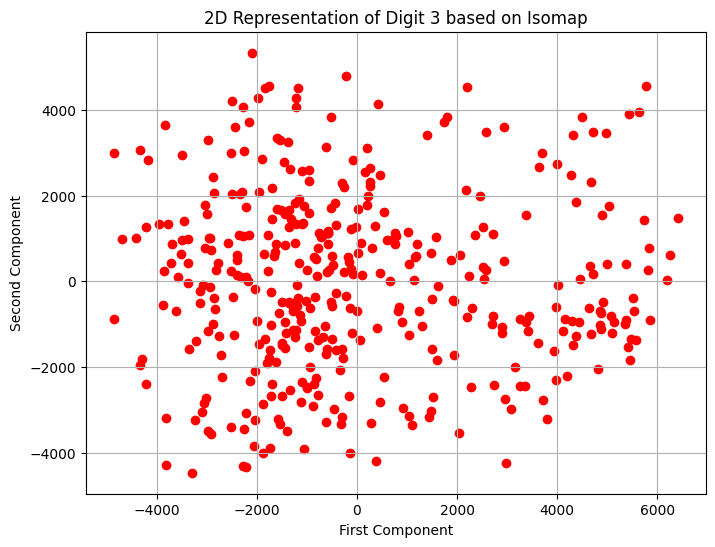

In [273]:
plt.figure(figsize=(8, 6))
plt.scatter(x_iso[:, 0], x_iso[:, 1], c='red',marker='o')
plt.title('2D Representation of Digit 3 based on Isomap')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.grid(True)
plt.show()

# **Analysis**

### In the Isomap Plot, the points are dispersed but they have a higher degree of clustering as several distinct clusters are visible. 
### It tends to preserve the global geometry and geodesic distances between points. The points that are far apart in the original space tend to be far apart in the reduced space as well.
### Isomap is better at capturing global relationships and could be more suitable for tasks like clustering or visualization. While LLE is senesitive to local vairations in the data and capture finer details, which might be lost in global approach like Isomap. For clustering purpose ISOMAP is better than LLE.
### In terms of pattern found, ISOMAP captures globally based since it aims to preserve the global geometry of the data.


### Q3 Use the Naive Bayes classifier to classify the dataset based on the projected 4-dimension representations of the LLE and ISOMAP. Train your classifier by randomly selected 70% of data, and test with remained 30%. Retrain for multiple iterations (using different random partitions of the data) and use the average accuracy of multiple runs for your analysis. Justify why your number of iterations was sufficient. Based on the average accuracies compare their performance with PCA and LDA. Discuss the result.

In [274]:
data = pd.read_csv('DataC.csv')

x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [275]:
def perform_analysis(data, labels, n_components=4, iterations=10):  # Reduced for testing
    results = {
        'LLE': [],
        'ISOMAP': [],
        'PCA': [],
        'LDA': []
    }
    
    for _ in range(iterations):
        print("Currently on iteration: ", _+1)
        X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3,random_state=42)
        
        lle = LocallyLinearEmbedding(n_neighbors=5,n_components=n_components)
        isomap = Isomap(n_neighbors=5,n_components=n_components)
        pca = PCA(n_components=n_components)
        lda = LinearDiscriminantAnalysis(n_components=n_components)

        for method, transformer in zip(['LLE', 'ISOMAP', 'PCA', 'LDA'], [lle, isomap, pca, lda]):
            X_train_transformed = transformer.fit_transform(X_train, y_train)
            X_test_transformed = transformer.transform(X_test)

            classifier = GaussianNB()
            classifier.fit(X_train_transformed, y_train)
            predictions = classifier.predict(X_test_transformed)
            accuracy = accuracy_score(y_test, predictions)
            results[method].append(accuracy*100)

    average_accuracies = {method: np.mean(accuracies) for method, accuracies in results.items()}
    return average_accuracies

average_accuracies = perform_analysis(x, y)
print(average_accuracies)

Currently on iteration:  1
Currently on iteration:  2
Currently on iteration:  3
Currently on iteration:  4
Currently on iteration:  5
Currently on iteration:  6
Currently on iteration:  7
Currently on iteration:  8
Currently on iteration:  9
Currently on iteration:  10
{'LLE': 98.22580645161291, 'ISOMAP': 95.32258064516131, 'PCA': 92.74193548387096, 'LDA': 94.67741935483869}


# **Analysis**

### The number of iterations (25) used to train and test the model. With two few iterations the accuracy estimate might be unreliable and susceptible to the variance introduced by random partitioning of the dataset. With too many it might be computationally tough to train. 

### From the accuracy results, LLE has the highest accuracy, indicating the local information captured by LLE projection is informative for the Naive Bayes classifier. It has preserved essential features.

### ISOMAP performs well but not as effective as LLE in this experiment. This suggests the global properties preserved by ISOMAP are less essential than the properties captured by LLE.

### PCA and LDA have lower accuracies than LLE, while PCA is least accurate. The lower accuracy of PCA suggests that variance-based approach to dimensionality reduction may not capture the most relevant features for classification in this case. LDA does slightly better than PCA, as LDA is designed to maximize the class sperability.